## Quantile regression¶

In [ ]:
# https://www.statsmodels.org/devel/examples/notebooks/generated/quantile_regression.html

In [ ]:
# Koenker, Roger and Kevin F. Hallock. “Quantile Regression”. Journal of Economic Perspectives, Volume 15, 
# Number 4, Fall 2001, Pages 143–156

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [ ]:
# Least Absolute Deviation¶
# The LAD model is a special case of quantile regression where q=0.5

In [3]:
mod = smf.quantreg("foodexp ~ income", data)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Tue, 08 Mar 2022   No. Observations:                  235
Time:                        13:26:01   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


In [ ]:
# Visualizing the results¶
# We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line 
# from each of these models to Ordinary Least Squares results.

In [4]:
quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["income"]] + res.conf_int().loc[
        "income"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("foodexp ~ income", data).fit()
ols_ci = ols.conf_int().loc["income"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["income"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

      q           a         b        lb        ub
0  0.05  124.880097  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033435  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.47538852370573, 'b': 0.48517842367692354, 'lb': 0.4568738130184233, 'ub': 0.5134830343354237}


In [ ]:
# This plot compares best fit lines for 10 quantile regression models to the least squares fit. 
# As Koenker and Hallock (2001) point out, we see that:

In [ ]:
# Food expenditure increases with income

# The dispersion of food expenditure increases with income

# The least squares estimates fit low income observations quite poorly (i.e. the OLS line passes over most low income households)

Text(0, 0.5, 'Food expenditure')

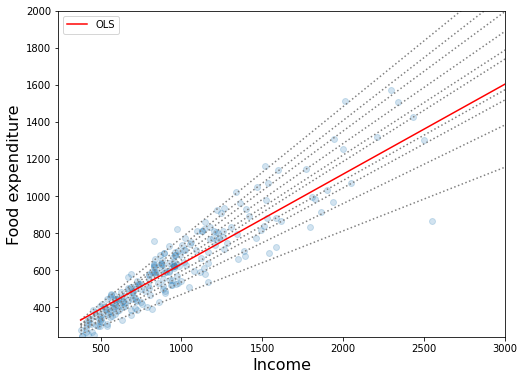

In [5]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle="dotted", color="grey")

y = get_y(ols["a"], ols["b"])

ax.plot(x, y, color="red", label="OLS")
ax.scatter(data.income, data.foodexp, alpha=0.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Food expenditure", fontsize=16)

In [ ]:
# Second plot¶
# The dotted black lines form 95% point-wise confidence band around 10 quantile regression estimates (solid black line). 
# The red lines represent OLS regression results along with their 95% confidence interval.

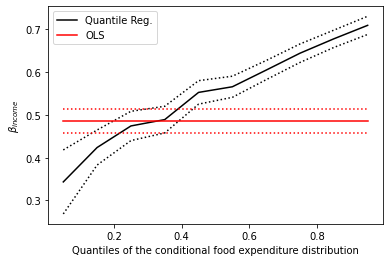

In [6]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
p4 = plt.plot(models.q, [ols["b"]] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols["lb"]] * n, linestyle="dotted", color="red")
p6 = plt.plot(models.q, [ols["ub"]] * n, linestyle="dotted", color="red")
plt.ylabel(r"$\beta_{income}$")
plt.xlabel("Quantiles of the conditional food expenditure distribution")
plt.legend()
plt.show()

In [ ]:
# 사용 데이터 : the Magic Bricks House data set (Kaggle)

# 데이터 설명 : Delhi 지역의 집 정보 데이터

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
house_data = pd.read_csv('C:/finance_data/MagicBricks.csv')

In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
# 면적에 따른 집 값 산점도

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='Price'>

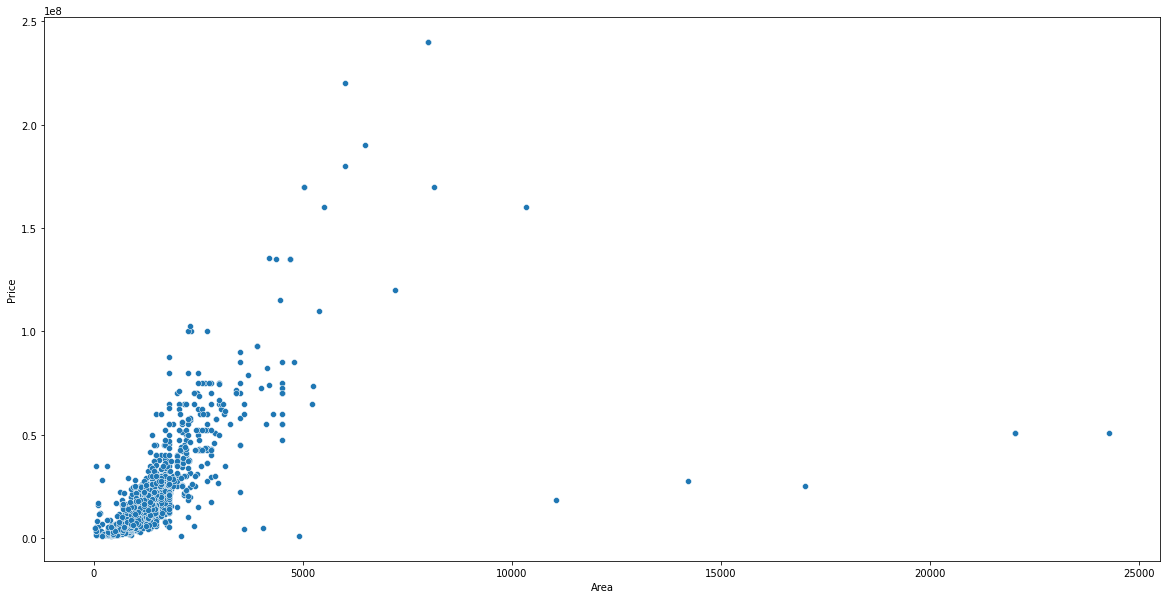

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
sns.scatterplot(house_data['Area'],house_data['Price'])

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

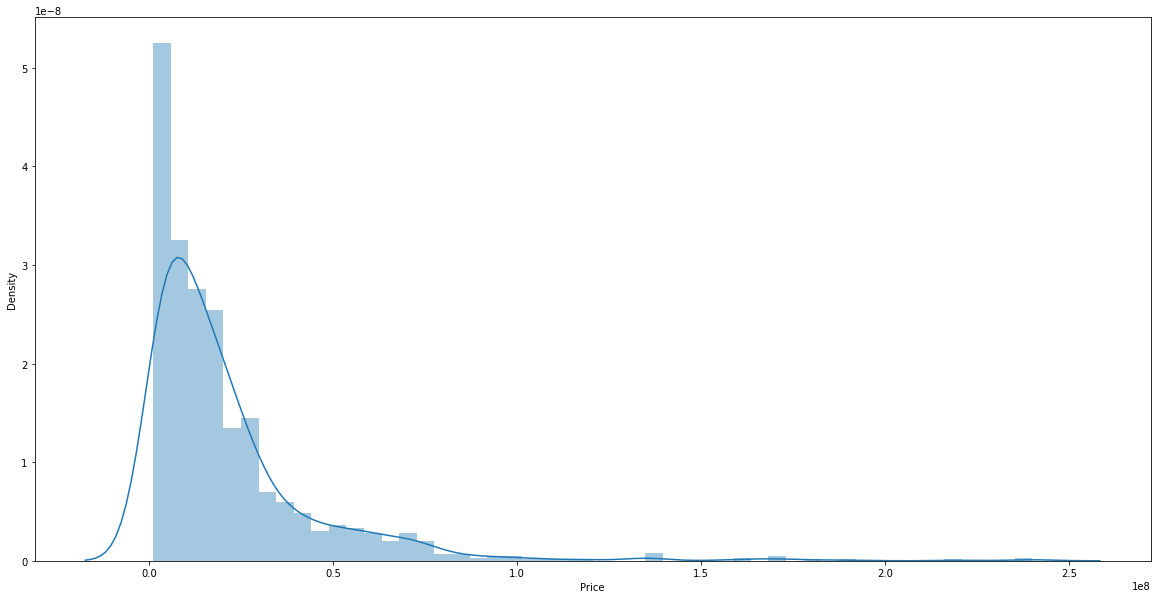

In [13]:
# 집 값 변수 히스토그램 확인
sns.distplot(house_data['Price'])

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

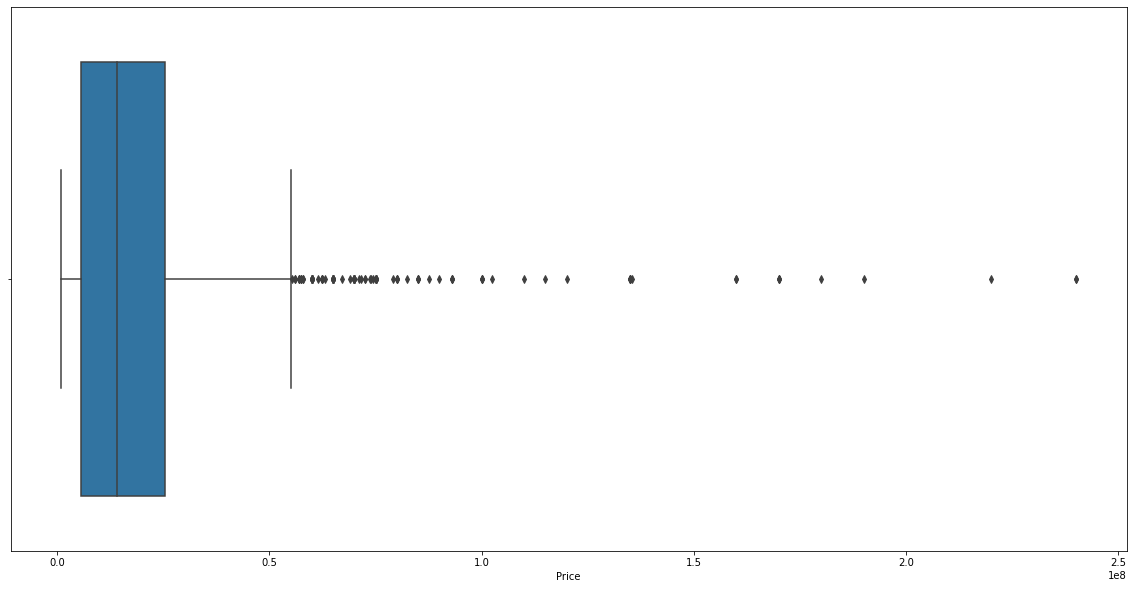

In [14]:
# 집 값 변수 박스 플랏 확인
sns.boxplot(house_data['Price'])

In [ ]:
# 선형회귀분석과 분위회귀분석 비교

In [15]:
X = house_data[['Area']]
y = house_data['Price']
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X,y)
y_pred = lm_model.predict(X)

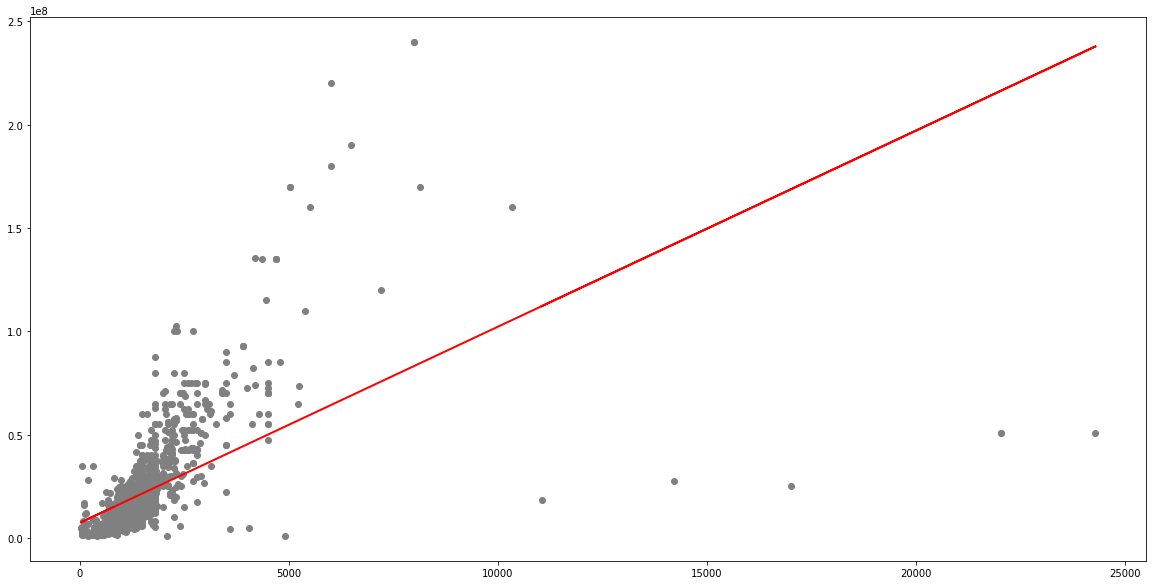

In [16]:
#산점도와 회귀 직선 시각화
plt.scatter(X['Area'], y, color ='gray')
plt.plot(X['Area'], y_pred, color ='red', linewidth=2)
plt.show()

In [17]:
# 분위 회귀 모형 
mod = smf.quantreg('Price ~ Area', house_data)

In [18]:
# 각 분위수에 따른 분위수 회귀 값 저장
quantiles = np.arange(.05,.96,.1) # quantiles = [.05,.15,.25,...,.95]

def fit_model(q):
  res = mod.fit(q=q)
  return [q, res.params['Intercept'], res.params['Area']] + \
  res.conf_int().loc['Area'].tolist()
  
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [19]:
# 비교를 위해 최소 기존의 선형 회귀 값도 저장
ols = smf.ols('Price ~ Area', house_data).fit()
ols_ci = ols.conf_int().loc['Area'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Area'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q             a             b            lb            ub
0  0.05  8.636895e-02   2098.765429   1481.475601   2716.055257
1  0.15 -6.783116e+05   6396.247894   5969.242836   6823.252952
2  0.25 -3.508403e+06  11484.593838  11174.694777  11794.492899
3  0.35 -4.735484e+06  14301.075269  14004.763747  14597.386790
4  0.45 -5.759494e+06  16835.443038  16549.306418  17121.579657
5  0.55 -6.103448e+06  18773.946360  18502.266094  19045.626627
6  0.65 -6.947059e+06  21529.411739  21244.895215  21813.928262
7  0.75 -6.649025e+06  23286.908078  22965.450310  23608.365846
8  0.85 -7.408257e+06  27522.935780  27096.523941  27949.347619
9  0.95 -1.385291e+06  30173.161354  28525.440210  31820.882498
{'a': 7400145.699394253, 'b': 9483.127416756277, 'lb': 8747.712271676222, 'ub': 10218.542561836332}


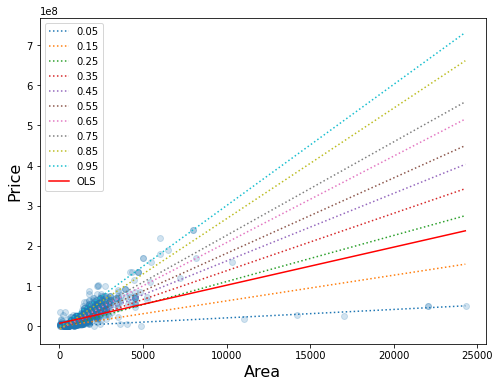

In [20]:
# 시각화 코드
# 일반 선형 회귀 모형은 빨간색 실선으로 표시
x = np.arange(house_data.Area.min(), house_data.Area.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', label= str(round(0.05 + i*0.1, 2)))

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(house_data.Area, house_data.Price, alpha=.2)
legend = ax.legend()
ax.set_xlabel('Area', fontsize=16)
ax.set_ylabel('Price', fontsize=16);

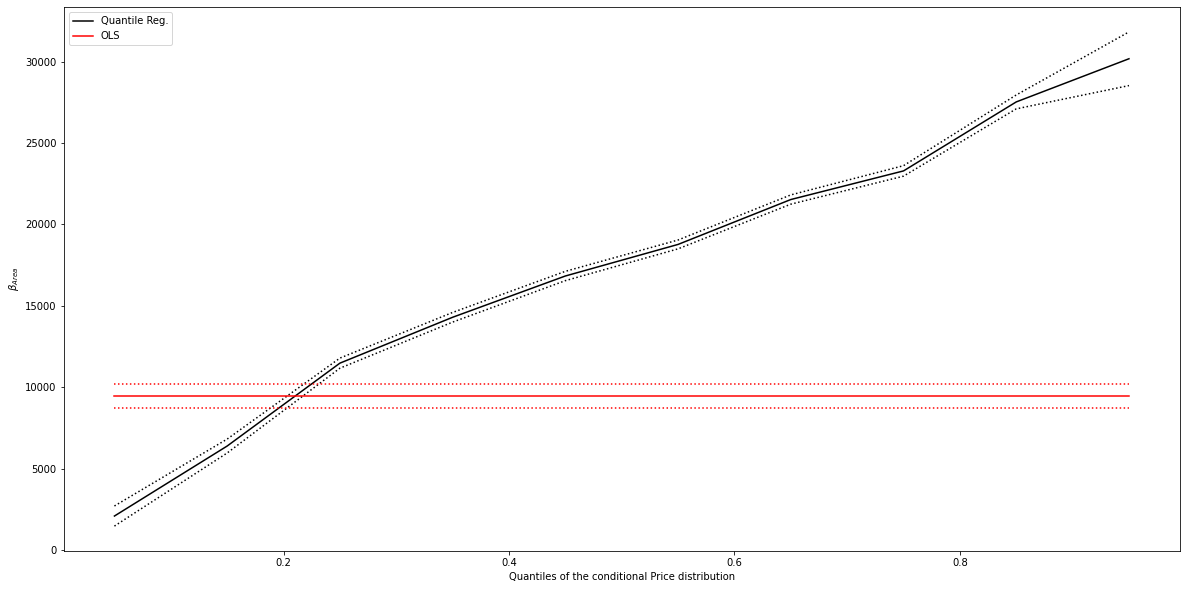

In [21]:
# 백분위 값에 따른 기울기 추정 값 시각화
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{Area}$')
plt.xlabel('Quantiles of the conditional Price distribution')
plt.legend()
plt.show()